In [39]:
!pip install finterstellar

In [40]:
# Import library
import finterstellar as fs
#System trading Library 설치: Finterstellar


In [41]:
# 1. RSI Performance and evaluation

In [42]:
# Get Price
df = fs.get_price('TSLA', start_date='2024-06-01', end_date='2025-06-13')
df


,TSLA
2024-06-03,176.29
2024-06-04,174.77
2024-06-05,175.00
2024-06-06,177.94
2024-06-07,177.48
...,...
2025-06-09,308.58
2025-06-10,326.09
2025-06-11,326.43
2025-06-12,319.11


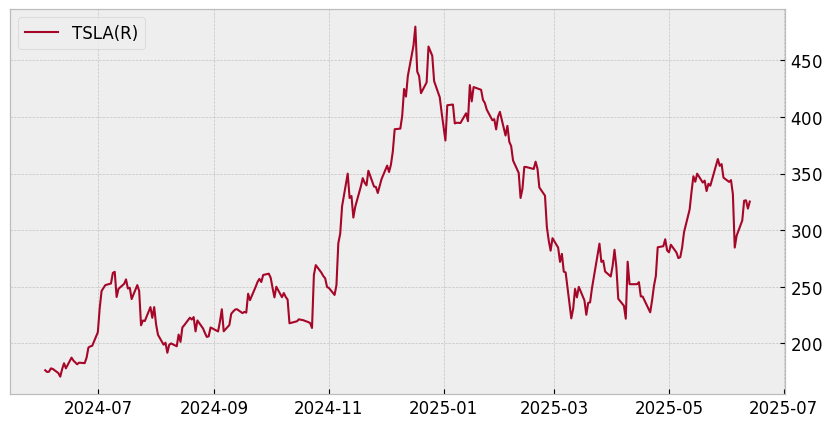

In [45]:
# symbol ： 종목코드 (문자열 또는 리스트 필수)
# start_date : 기간 시작 일자 (날짜 생략 시 종료 일자 1년 전)
# end_date: : 기간 종료 일자 (날짜 생략 시 최근 거래일)
# Draw Chart
## fs.draw_chart（df, left=‘OO’, right=‘OO’, log）
# df : 차트에 표시할 데이터 데이터프레임 필수）
# left ：왼쪽 y 축에 표시할 값 (데이터프레임의 칼럼 생략 가능）
# right：오른쪽 y 축에 표시할 값 (데이터프레임의 칼럼, 생략 가능）
# log ： y축을 로그로 표시할지 여부 （True/False, 기본 False）

fs.draw_chart(df, right=symbol)

In [46]:
fs.rsi(df, w=20)

,TSLA,rsi
2024-06-03,176.29,NaN
2024-06-04,174.77,NaN
2024-06-05,175.00,NaN
2024-06-06,177.94,NaN
2024-06-07,177.48,NaN
...,...,...
2025-06-09,308.58,49.11
2025-06-10,326.09,53.05
2025-06-11,326.43,53.12
2025-06-12,319.11,51.29


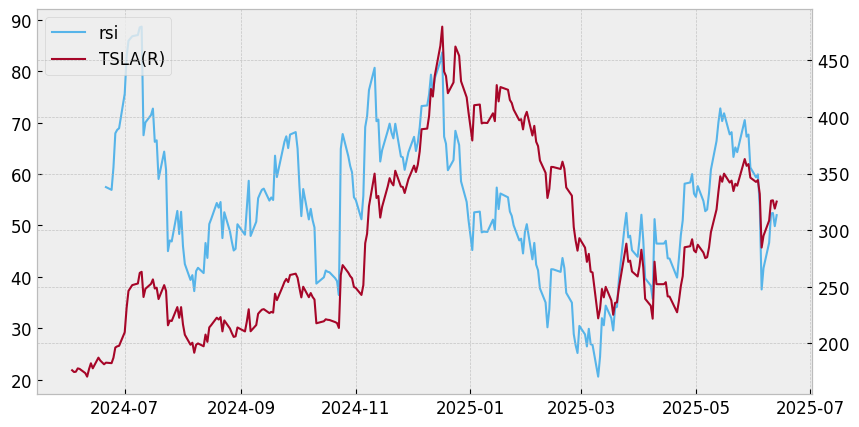

In [47]:
fs.rsi(df, w=14)
fs.draw_chart(df, left='rsi', right= 'TSLA')

In [48]:
fs.indicator_to_signal(df, factor='rsi', buy=40, sell=60)

,trade
2024-06-03,zero
2024-06-04,zero
2024-06-05,zero
2024-06-06,zero
2024-06-07,zero
...,...
2025-06-09,buy
2025-06-10,buy
2025-06-11,buy
2025-06-12,buy


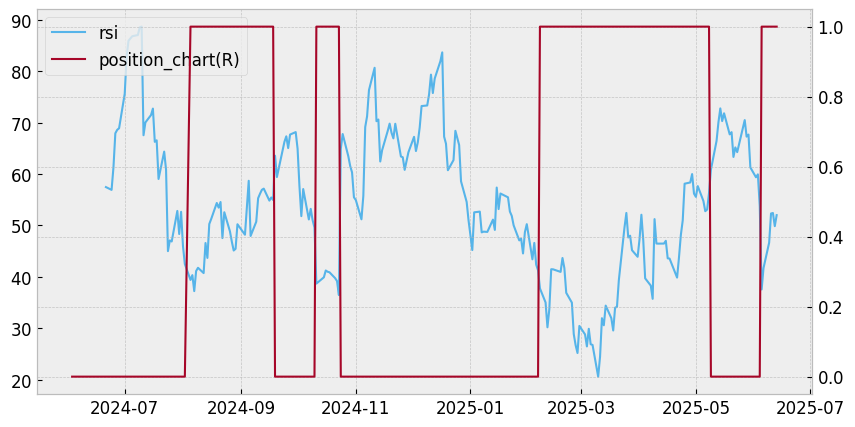

In [49]:
fs.position(df)
fs.draw_chart(df, left='rsi', right='position_chart')

In [50]:
fs.evaluate(df, cost= .001)

,TSLA,diff,au,ad,rsi,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
2024-06-03,176.29,NaN,NaN,NaN,NaN,zero,,0,1.00,1.00,1.00,0.00,1.00,1.00
2024-06-04,174.77,-1.52,NaN,NaN,NaN,zero,zz,0,1.00,1.00,1.00,0.00,1.00,0.99
2024-06-05,175.00,0.23,NaN,NaN,NaN,zero,zz,0,1.00,1.00,1.00,0.00,1.00,0.99
2024-06-06,177.94,2.94,NaN,NaN,NaN,zero,zz,0,1.00,1.00,1.00,0.00,1.00,1.00
2024-06-07,177.48,-0.46,NaN,NaN,NaN,zero,zz,0,1.00,1.00,1.00,0.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-09,308.58,13.44,5.29,6.04,46.66,buy,ll,1,1.00,1.05,1.31,30.74,0.89,0.64
2025-06-10,326.09,17.51,6.16,5.61,52.33,buy,ll,1,1.00,1.06,1.38,38.15,0.94,0.68
2025-06-11,326.43,0.34,5.74,5.21,52.43,buy,ll,1,1.00,1.00,1.38,38.30,0.94,0.68
2025-06-12,319.11,-7.32,5.33,5.36,49.87,buy,ll,1,1.00,0.98,1.35,35.20,0.92,0.67


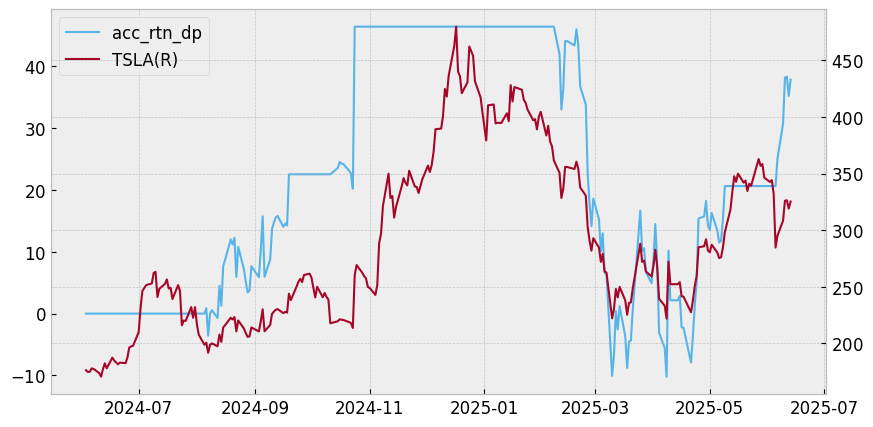

In [51]:
fs. draw_chart(df, left='acc_rtn_dp', right='TSLA')

In [52]:
fs.performance(df, rf_rate=0.01)

CAGR: 38.67%
Accumulated return: 37.82%
Average return: 8.13%
Benchmark return : 77.76%
Number of trades: 4
Number of win: 2
Hit ratio: 50.00%
Investment period: 1.0yrs
Sharpe ratio: 0.57
MDD: -38.65%
Benchmark MDD: -53.77%


In [53]:
# 2.MACD Performance and evaluation

In [54]:
symbol = 'TSLA'
df2 = fs.get_price(symbol, start_date='2022-05-31', end_date='2025-05-31')

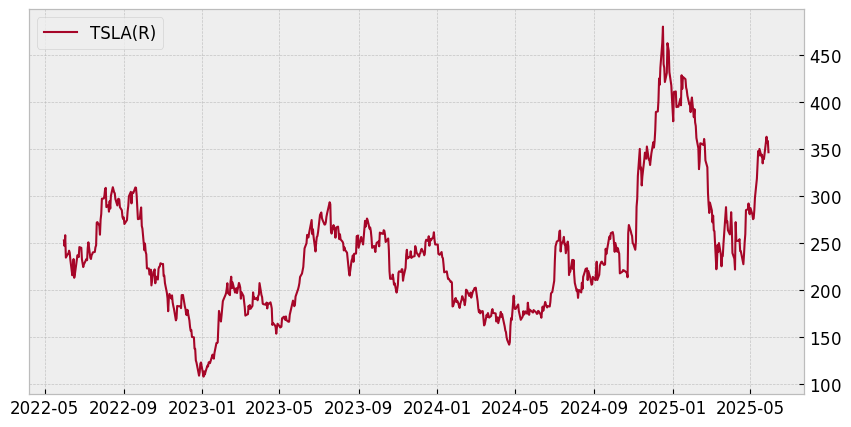

In [55]:
fs.draw_chart(df2, right=symbol)

In [56]:
fs.macd(df2)
df2.tail()

,TSLA,ema_short,ema_long,macd,macd_signal,macd_oscillator
2025-05-23,339.34,328.70,308.53,20.18,17.99,2.19
2025-05-27,362.89,333.96,312.55,21.41,18.67,2.74
2025-05-28,356.90,337.49,315.84,21.65,19.27,2.38
2025-05-29,358.43,340.71,318.99,21.72,19.76,1.96
2025-05-30,346.46,341.60,321.03,20.57,19.92,0.65


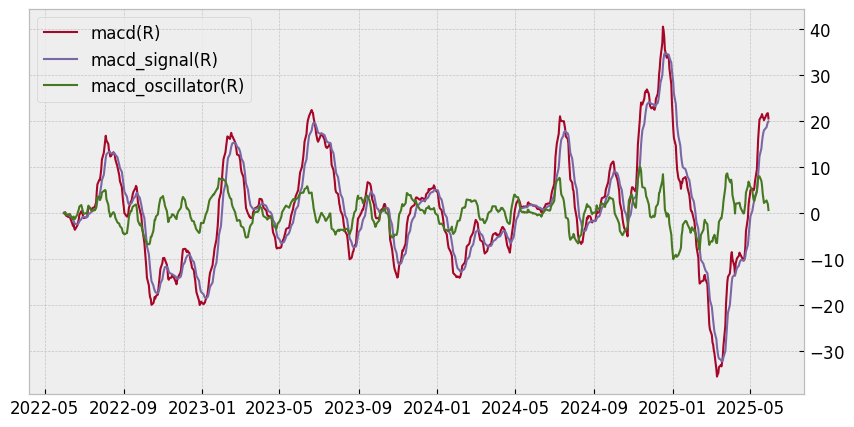

In [57]:
fs.draw_chart(df2, right=['macd','macd_signal','macd_oscillator'])

In [58]:
fs.indicator_to_signal(df2, factor='macd_oscillator', buy=0, sell=0)

,trade
2022-05-31,zero
2022-06-01,zero
2022-06-02,buy
2022-06-03,zero
2022-06-06,zero
...,...
2025-05-23,buy
2025-05-27,buy
2025-05-28,buy
2025-05-29,buy


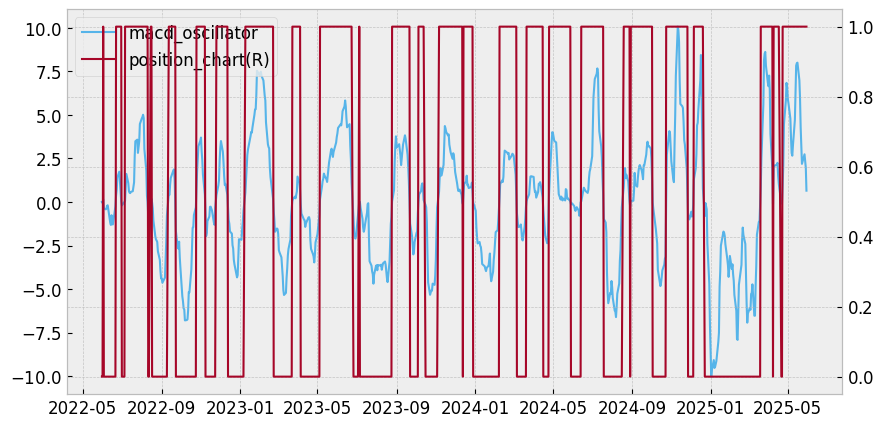

In [59]:
fs.position(df2)
fs.draw_chart(df2, right='position_chart', left='macd_oscillator')

CAGR: 48.01%
Accumulated return: 224.26%
Average return: 5.04%
Benchmark return : 37.08%
Number of trades: 26
Number of win: 10
Hit ratio: 38.46%
Investment period: 3.0yrs
Sharpe ratio: 0.89
MDD: -38.29%
Benchmark MDD: -65.05%


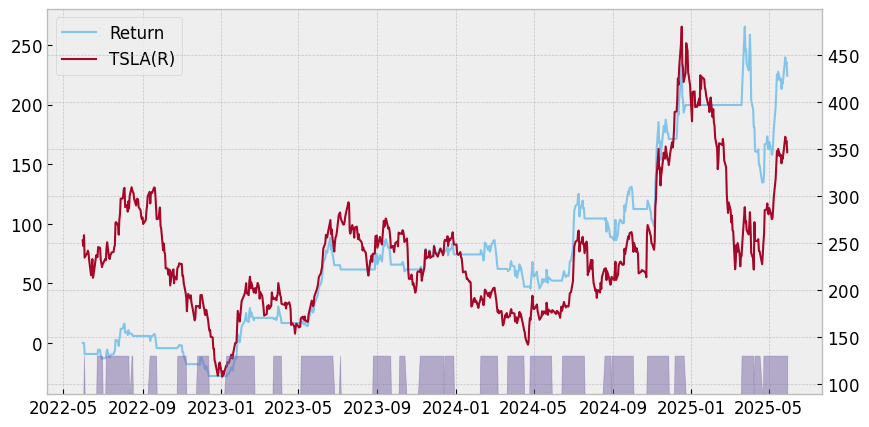

In [60]:
fs.evaluate(df2, cost=.001)
fs.performance(df2, rf_rate=0.02)
fs.draw_trade_results(df2)

In [61]:
# 3. Bollinger Band Performance and Evaluation

In [62]:
symbol = 'TSLA'
df3 = fs.get_price(symbol, start_date='2022-05-31', end_date='2025-05-31')

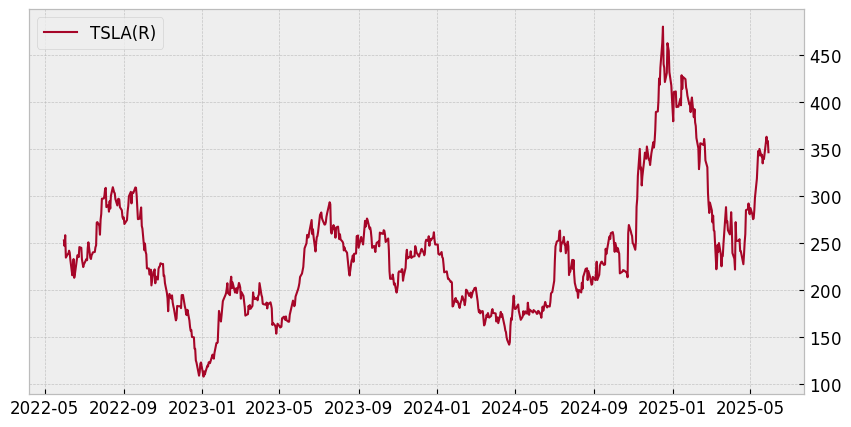

In [63]:
fs.draw_chart(df3, right=symbol)

In [65]:
fs.bollinger(df3, w=20, k=2)
df3.tail()

,TSLA,center,sigma,ub,lb
2025-05-23,339.34,311.83,29.33,370.49,253.16
2025-05-27,362.89,315.68,30.77,377.21,254.14
2025-05-28,356.90,318.92,31.55,382.03,255.82
2025-05-29,358.43,322.74,31.48,385.70,259.77
2025-05-30,346.46,326.03,30.26,386.55,265.51


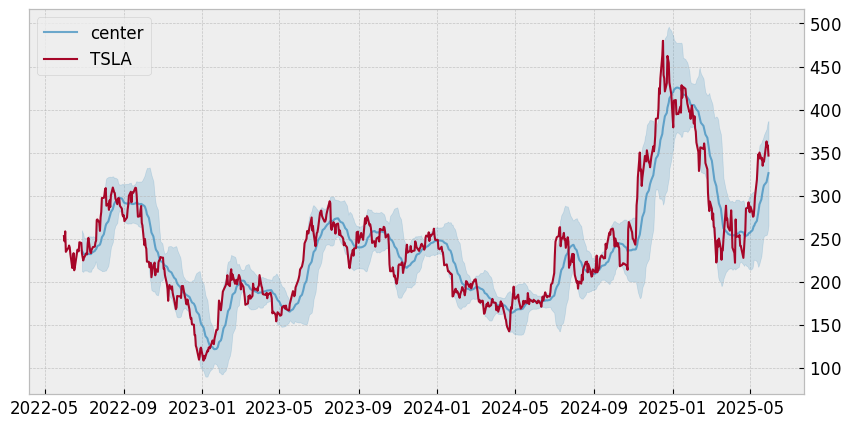

In [67]:
fs.draw_band_chart(df3)

In [68]:
fs.band_to_signal(df3, buy='A', sell='B')

,trade
2022-05-31,zero
2022-06-01,zero
2022-06-02,zero
2022-06-03,zero
2022-06-06,zero
...,...
2025-05-23,zero
2025-05-27,zero
2025-05-28,zero
2025-05-29,zero


In [69]:
fs.position(df3)

,position
2022-05-31,
2022-06-01,zz
2022-06-02,zz
2022-06-03,zz
2022-06-06,zz
...,...
2025-05-23,zz
2025-05-27,zz
2025-05-28,zz
2025-05-29,zz


CAGR: 20.00%
Accumulated return: 70.42%
Average return: 2.90%
Benchmark return : 48.91%
Number of trades: 21
Number of win: 12
Hit ratio: 57.14%
Investment period: 2.9yrs
Sharpe ratio: 0.83
MDD: -15.99%
Benchmark MDD: -65.05%


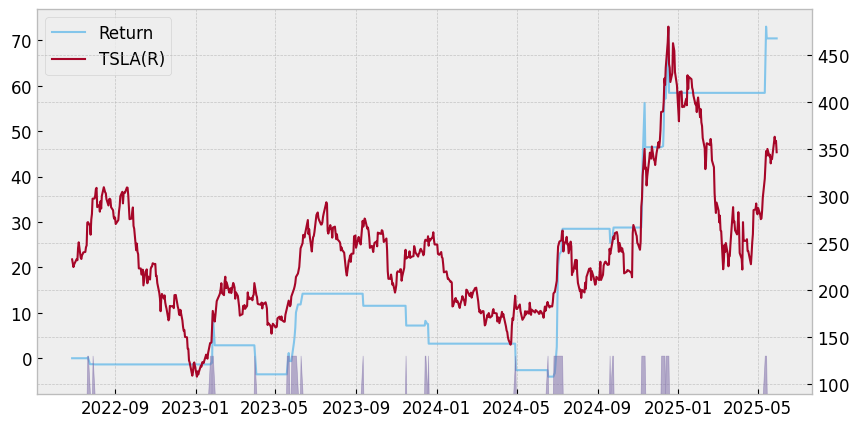

In [70]:
fs.evaluate(df3, cost=.001)
fs.performance(df3, rf_rate=0.02)
fs.draw_trade_results(df3)

In [73]:
fs.band_to_signal(df3, buy='D', sell='B')

,trade
2022-06-28,zero
2022-06-29,zero
2022-06-30,zero
2022-07-01,zero
2022-07-05,zero
...,...
2025-05-23,zero
2025-05-27,zero
2025-05-28,zero
2025-05-29,zero


In [74]:
fs.position(df3)

,position
2022-06-28,
2022-06-29,zz
2022-06-30,zz
2022-07-01,zz
2022-07-05,zz
...,...
2025-05-23,zz
2025-05-27,zz
2025-05-28,zz
2025-05-29,zz


CAGR: -4.69%
Accumulated return: -13.10%
Average return: -0.40%
Benchmark return : 48.91%
Number of trades: 12
Number of win: 7
Hit ratio: 58.33%
Investment period: 2.9yrs
Sharpe ratio: -0.16
MDD: -39.33%
Benchmark MDD: -65.05%


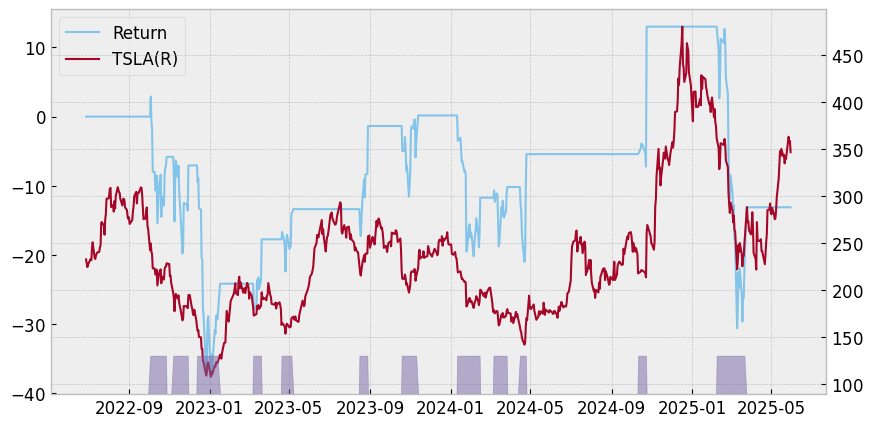

In [75]:
fs.evaluate(df3, cost=.001)
fs.performance(df3, rf_rate=0.02)
fs.draw_trade_results(df3)

In [76]:
# 4. Envelpoe Performance and Evaluation

In [77]:
symbol = 'TSLA'
df4 = fs.get_price(symbol, start_date='2022-05-31', end_date='2025-05-31')

In [78]:
fs.envelope(df4, w=20, spread=0.1)
df4.tail()

,TSLA,center,ub,lb
2025-05-23,339.34,311.83,343.01,280.64
2025-05-27,362.89,315.68,347.25,284.11
2025-05-28,356.90,318.92,350.81,287.03
2025-05-29,358.43,322.74,355.01,290.46
2025-05-30,346.46,326.03,358.64,293.43


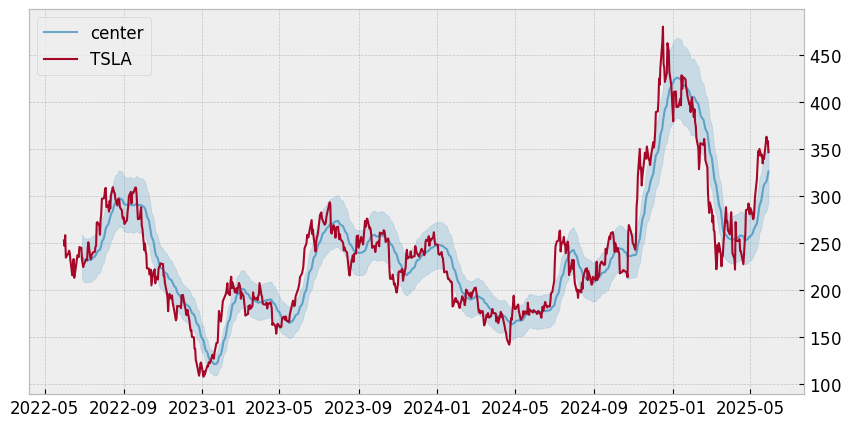

In [79]:
fs.draw_band_chart(df4)

In [80]:
fs.band_to_signal(df4, buy='A', sell='B')

,trade
2022-05-31,zero
2022-06-01,zero
2022-06-02,zero
2022-06-03,zero
2022-06-06,zero
...,...
2025-05-23,zero
2025-05-27,buy
2025-05-28,buy
2025-05-29,buy


In [81]:
fs.position(df4)

,position
2022-05-31,
2022-06-01,zz
2022-06-02,zz
2022-06-03,zz
2022-06-06,zz
...,...
2025-05-23,lz
2025-05-27,zl
2025-05-28,ll
2025-05-29,ll


CAGR: 21.23%
Accumulated return: 75.56%
Average return: 2.66%
Benchmark return : 48.91%
Number of trades: 27
Number of win: 9
Hit ratio: 33.33%
Investment period: 2.9yrs
Sharpe ratio: 0.62
MDD: -29.76%
Benchmark MDD: -65.05%


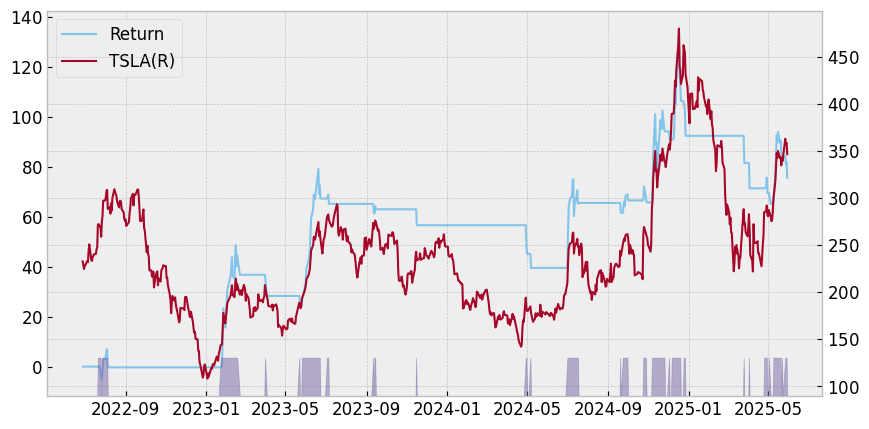

In [82]:
fs.evaluate(df4, cost=.001)
fs.performance(df4, rf_rate=0.02)
fs.draw_trade_results(df4)

In [83]:
fs.band_to_signal(df4, buy='D', sell='B')

,trade
2022-06-28,zero
2022-06-29,zero
2022-06-30,zero
2022-07-01,zero
2022-07-05,zero
...,...
2025-05-23,zero
2025-05-27,zero
2025-05-28,zero
2025-05-29,zero


In [84]:
fs.position(df4)

,position
2022-06-28,
2022-06-29,zz
2022-06-30,zz
2022-07-01,zz
2022-07-05,zz
...,...
2025-05-23,zz
2025-05-27,zz
2025-05-28,zz
2025-05-29,zz


CAGR: 16.62%
Accumulated return: 56.76%
Average return: 3.84%
Benchmark return : 48.91%
Number of trades: 15
Number of win: 10
Hit ratio: 66.67%
Investment period: 2.9yrs
Sharpe ratio: 0.31
MDD: -39.00%
Benchmark MDD: -65.05%


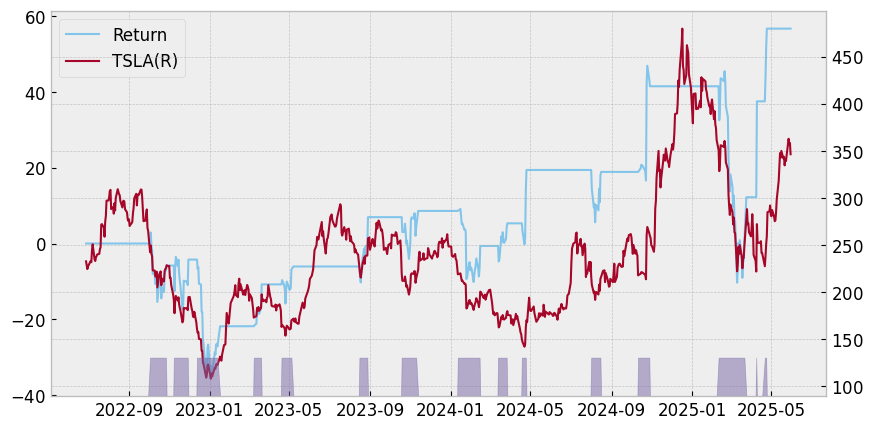

In [85]:
fs.evaluate(df4, cost=.001)
fs.performance(df4, rf_rate=0.02)
fs.draw_trade_results(df4)

In [86]:
# 5. Stochastics Performance and Evaluation

In [103]:
symbol = 'TSLA'
df5 = fs.get_ohlc(symbol, start_date='2022-05-31', end_date='2025-05-31')
df5.tail()

,Open,High,Low,Close,Volume,Adj Close
2025-05-23,337.92,343.18,333.21,339.34,84654800,339.34
2025-05-27,347.35,363.79,347.32,362.89,120146400,362.89
2025-05-28,364.84,365.00,355.91,356.90,91404300,356.90
2025-05-29,365.29,367.71,356.00,358.43,88545700,358.43
2025-05-30,355.52,363.68,345.29,346.46,123474900,346.46


In [104]:
fs.stochastic(df5, symbol, n=14, m=3, t=3)
df5.tail()

,TSLA,slow_k,slow_d
2025-05-23,339.34,80.17,81.89
2025-05-27,362.89,87.93,83.35
2025-05-28,356.90,90.31,86.14
2025-05-29,358.43,92.54,90.26
2025-05-30,346.46,80.27,87.71


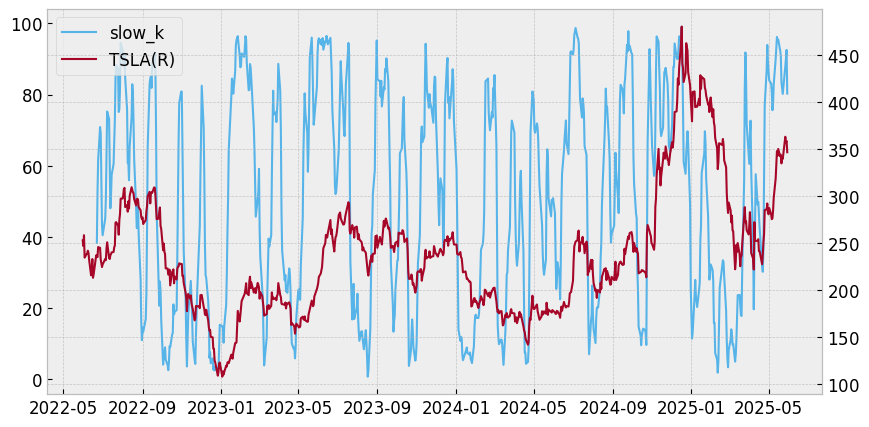

In [105]:
fs.draw_chart(df5, left='slow_k', right=symbol)

In [108]:
fs.indicator_to_signal(df5, factor='slow_k', buy=20, sell=80)

,trade
2022-05-31,zero
2022-06-01,zero
2022-06-02,zero
2022-06-03,zero
2022-06-06,zero
...,...
2025-05-23,zero
2025-05-27,zero
2025-05-28,zero
2025-05-29,zero


In [109]:
fs.position(df5)

,position
2022-05-31,
2022-06-01,zz
2022-06-02,zz
2022-06-03,zz
2022-06-06,zz
...,...
2025-05-23,zz
2025-05-27,zz
2025-05-28,zz
2025-05-29,zz


CAGR: -4.78%
Accumulated return: -13.39%
Average return: 0.05%
Benchmark return : 41.00%
Number of trades: 14
Number of win: 8
Hit ratio: 57.14%
Investment period: 2.9yrs
Sharpe ratio: -0.13
MDD: -52.58%
Benchmark MDD: -65.05%


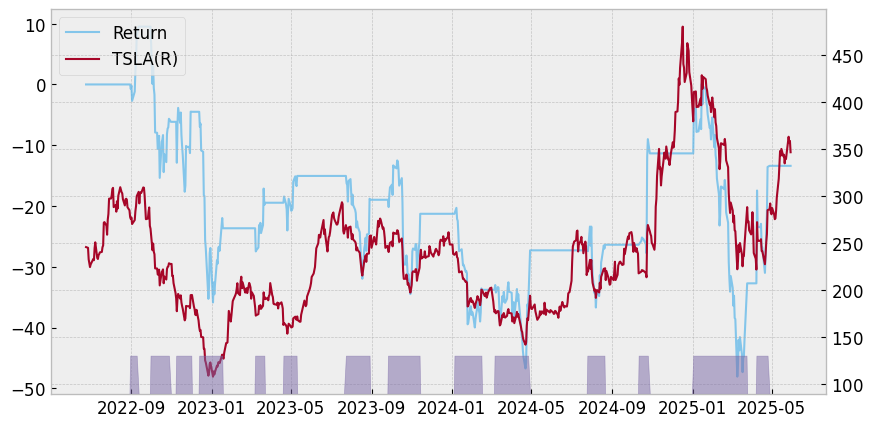

In [110]:
fs.evaluate(df5, cost=.001)
fs.performance(df5, rf_rate=0.02)
fs.draw_trade_results(df5)

In [111]:
df5['indicator'] = df5['slow_k'] - df5['slow_d']
df5.tail()

,TSLA,slow_k,slow_d,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd,exs_rtn_daily,indicator
2025-05-23,339.34,80.17,81.89,zero,zz,0,1.00,1.00,0.87,-13.39,0.79,0.71,-0.00,-1.72
2025-05-27,362.89,87.93,83.35,zero,zz,0,1.00,1.00,0.87,-13.39,0.79,0.76,-0.00,4.58
2025-05-28,356.90,90.31,86.14,zero,zz,0,1.00,1.00,0.87,-13.39,0.79,0.74,-0.00,4.17
2025-05-29,358.43,92.54,90.26,zero,zz,0,1.00,1.00,0.87,-13.39,0.79,0.75,-0.00,2.28
2025-05-30,346.46,80.27,87.71,zero,zz,0,1.00,1.00,0.87,-13.39,0.79,0.72,-0.00,-7.44


In [112]:
fs.indicator_to_signal(df5, factor='indicator', buy=0, sell=0)

,trade
2022-06-24,buy
2022-06-27,buy
2022-06-28,buy
2022-06-29,zero
2022-06-30,zero
...,...
2025-05-23,zero
2025-05-27,buy
2025-05-28,buy
2025-05-29,buy


In [113]:
fs.position(df5)

,position
2022-06-24,
2022-06-27,ll
2022-06-28,ll
2022-06-29,lz
2022-06-30,zz
...,...
2025-05-23,zz
2025-05-27,zl
2025-05-28,ll
2025-05-29,ll


CAGR: 9.21%
Accumulated return: 29.50%
Average return: 0.56%
Benchmark return : 41.00%
Number of trades: 94
Number of win: 40
Hit ratio: 42.55%
Investment period: 2.9yrs
Sharpe ratio: 0.14
MDD: -44.23%
Benchmark MDD: -65.05%


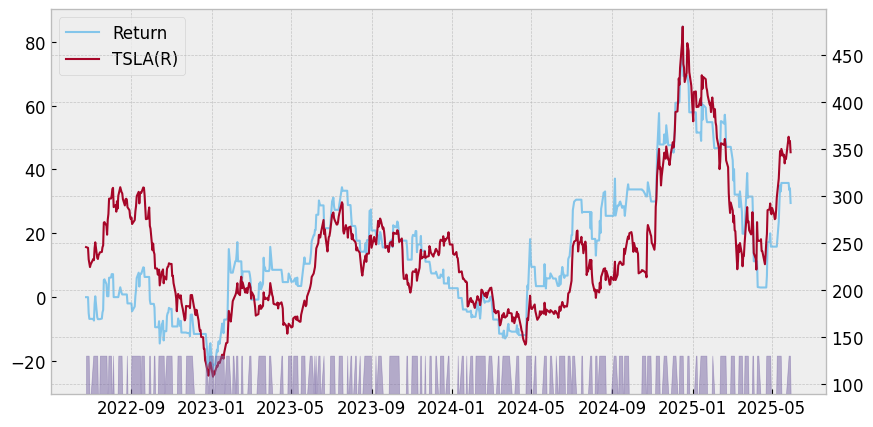

In [114]:
fs.evaluate(df5, cost=.001)
fs.performance(df5, rf_rate=0.02)
fs.draw_trade_results(df5)